In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
data =pd.read_csv("heart_attack_russia_youth_vs_adult.csv")


# Heart_Attack is my target variable.

In [4]:
data.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,Moderate,False,False,8,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,NaN,False,True,5,False,True,False,Unhealthy,5.5,Employed,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,Moderate,True,False,8,False,False,False,Unhealthy,8.8,Employed,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,Moderate,False,True,5,False,False,False,Healthy,8.2,Student,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,NaN,False,True,1,False,False,False,Unhealthy,5.9,Employed,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [5]:
data.info() #no inconsistent data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

# Checking redundant columns i.e. ID

In [7]:
data.drop("ID",axis=1,inplace=True)

In [8]:
data.shape

(50000, 29)

In [9]:
data.head(1)

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,50,Male,Rural,110.0,196.5,15.9,76,High,False,Moderate,False,False,8,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5,2.3,5,False


# Checking duplicate rows 

In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [12]:
data[data.duplicated()]

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


# Checking null values 

In [14]:
data.shape

(50000, 29)

In [15]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000
Gender                    0.000
Region                    0.000
Blood_Pressure            0.000
Cholesterol               0.000
BMI                       0.000
Heart_Rate                0.000
Exercise_Level            0.000
Smoking                   0.000
Alcohol_Consumption      50.048
Diabetes                  0.000
Family_History            0.000
Stress_Level              0.000
Heart_Attack              0.000
Angina                    0.000
Heart_Disease_History     0.000
Diet                      0.000
Sleep_Hours               0.000
Occupation                0.000
Income_Level              0.000
Physical_Activity         0.000
Education_Level           0.000
Marital_Status            0.000
Urban_Rural               0.000
Medication                0.000
Health_Awareness          0.000
Daily_Water_Intake        0.000
Mental_Health             0.000
Obesity                   0.000
dtype: float64

In [16]:
data.Heart_Attack.unique()

array([False,  True])

In [17]:
d = data[data["Heart_Attack"].isnull()==True].index

In [18]:
d

Index([], dtype='int64')

In [19]:
data.drop(d,inplace=True)

# Filling null values 

In [21]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000
Gender                    0.000
Region                    0.000
Blood_Pressure            0.000
Cholesterol               0.000
BMI                       0.000
Heart_Rate                0.000
Exercise_Level            0.000
Smoking                   0.000
Alcohol_Consumption      50.048
Diabetes                  0.000
Family_History            0.000
Stress_Level              0.000
Heart_Attack              0.000
Angina                    0.000
Heart_Disease_History     0.000
Diet                      0.000
Sleep_Hours               0.000
Occupation                0.000
Income_Level              0.000
Physical_Activity         0.000
Education_Level           0.000
Marital_Status            0.000
Urban_Rural               0.000
Medication                0.000
Health_Awareness          0.000
Daily_Water_Intake        0.000
Mental_Health             0.000
Obesity                   0.000
dtype: float64

In [22]:
for i in data.select_dtypes(include="object"):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [23]:
data.Alcohol_Consumption.mode()[0]

'Moderate'

In [24]:
for i in data.select_dtypes(exclude="object"):
    data[i].fillna(data[i].mean(),inplace=True)

In [25]:
data.isnull().sum()/data.shape[0]*100

Age                      0.0
Gender                   0.0
Region                   0.0
Blood_Pressure           0.0
Cholesterol              0.0
BMI                      0.0
Heart_Rate               0.0
Exercise_Level           0.0
Smoking                  0.0
Alcohol_Consumption      0.0
Diabetes                 0.0
Family_History           0.0
Stress_Level             0.0
Heart_Attack             0.0
Angina                   0.0
Heart_Disease_History    0.0
Diet                     0.0
Sleep_Hours              0.0
Occupation               0.0
Income_Level             0.0
Physical_Activity        0.0
Education_Level          0.0
Marital_Status           0.0
Urban_Rural              0.0
Medication               0.0
Health_Awareness         0.0
Daily_Water_Intake       0.0
Mental_Health            0.0
Obesity                  0.0
dtype: float64

In [27]:
data.Heart_Attack = data["Heart_Attack"].astype(np.number)

C:\Users\mmahe\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [28]:
x=data.drop("Heart_Attack",axis=1)
y = data.Heart_Attack

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)

# Outlier treatment 

In [64]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

In [66]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Female' 'Other' 'Male']
Region
['Urban' 'Rural' 'Suburban']
Exercise_Level
['Moderate' 'Low' 'High']
Alcohol_Consumption
['Moderate' 'Heavy']
Diet
['Mixed' 'Healthy' 'Unhealthy']
Occupation
['Employed' 'Unemployed' 'Student' 'Retired']
Income_Level
['Middle' 'Low' 'High']
Physical_Activity
['Moderate' 'High' 'Low']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Single' 'Divorced' 'Widowed']
Urban_Rural
['Rural' 'Urban']


## excersie level , alochol consuption , income level , physical activity ,diet 
## education level --- has ordinal data 

In [69]:
ordrinal_data = ["Physical_Activity","Income_Level","Exercise_Level"]

In [71]:
for i in ordrinal_data:
    xtest[i]=xtest[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    xtrain[i]=xtrain[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    

In [72]:
for i in ordrinal_data:
    print(i,xtrain[i].unique(),xtest[i].unique())

Physical_Activity [2 3 1] [2 1 3]
Income_Level [2 1 3] [3 2 1]
Exercise_Level [2 1 3] [1 2 3]


In [75]:
xtest["Diet"]=xtest["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"]=xtrain["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"].unique(),xtest["Diet"].unique()    

(array([2, 3, 1], dtype=int64), array([2, 3, 1], dtype=int64))

In [77]:
xtest["Alcohol_Consumption"]=xtest["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else  2)
xtrain["Alcohol_Consumption"]=xtrain["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else   2)
xtrain["Alcohol_Consumption"].unique(),xtest["Alcohol_Consumption"].unique()    

(array([2, 3], dtype=int64), array([2, 3], dtype=int64))

In [80]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Female' 'Other' 'Male']
Region
['Urban' 'Rural' 'Suburban']
Occupation
['Employed' 'Unemployed' 'Student' 'Retired']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Single' 'Divorced' 'Widowed']
Urban_Rural
['Rural' 'Urban']


In [82]:
nomial_1= ["Obesity","Smoking","Diabetes","Family_History","Angina","Heart_Disease_History","Medication"]

In [84]:
for i in nomial_1:
    xtrain[i]=xtrain[i].astype(np.int64)
    xtest[i]=xtest[i].astype(np.int64)
    print(i, xtrain[i].unique(),xtest[i].unique())

Obesity [0 1] [0 1]
Smoking [1 0] [0 1]
Diabetes [1 0] [0 1]
Family_History [0 1] [0 1]
Angina [0 1] [0 1]
Heart_Disease_History [0 1] [0 1]
Medication [1 0] [0 1]


In [86]:
Onehot_dummy=[]

In [88]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())
    Onehot_dummy.append(i)

Gender
['Female' 'Other' 'Male']
Region
['Urban' 'Rural' 'Suburban']
Occupation
['Employed' 'Unemployed' 'Student' 'Retired']
Education_Level
['Secondary' 'Higher' 'Primary']
Marital_Status
['Married' 'Single' 'Divorced' 'Widowed']
Urban_Rural
['Rural' 'Urban']


In [90]:
Onehot_dummy.pop()

'Urban_Rural'

In [92]:
Onehot_dummy

['Gender', 'Region', 'Occupation', 'Education_Level', 'Marital_Status']

In [94]:
for i in Onehot_dummy:
    xtrain = pd.concat([xtrain,pd.get_dummies(xtrain[i]).astype(np.int64)],axis=1)
    xtrain.drop(i,axis=1,inplace=True)
    xtest = pd.concat([xtest,pd.get_dummies(xtest[i]).astype(np.int64)],axis=1)
    xtest.drop(i,axis=1,inplace=True)
    print(xtrain.shape,xtest.shape)

(40000, 30) (10000, 30)
(40000, 32) (10000, 32)
(40000, 35) (10000, 35)
(40000, 37) (10000, 37)
(40000, 40) (10000, 40)


In [95]:
xtrain

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
18542,38,137.5,249.9,20.5,95,2,1,2,1,0,4,0,0,2,9.9,2,2,Rural,1,5,3.4,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
41418,12,112.3,244.9,26.3,61,1,0,2,0,0,2,0,0,2,5.0,1,3,Urban,0,2,4.8,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
14092,14,127.3,202.4,30.1,65,2,1,2,0,0,1,0,0,3,9.5,1,2,Rural,0,4,2.1,8,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
44522,28,139.0,268.2,23.7,77,3,0,2,0,0,5,0,0,1,6.7,2,2,Rural,0,4,1.9,8,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
18071,38,125.2,133.3,30.9,100,1,0,2,0,0,4,0,0,2,8.0,2,3,Urban,0,5,3.7,5,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,41,112.8,218.8,37.9,95,1,0,2,0,0,8,0,0,1,7.5,1,2,Urban,0,5,3.0,8,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
33634,17,133.5,178.4,29.9,98,2,0,2,0,0,2,0,0,1,4.2,2,2,Rural,1,1,4.0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
32842,40,113.3,143.5,26.8,75,2,1,2,0,0,1,0,0,1,7.0,3,2,Urban,0,1,2.2,3,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
47280,47,140.5,218.4,22.3,97,3,0,2,0,0,5,0,0,3,9.9,1,3,Urban,0,4,1.6,4,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [96]:
xtest["Urban_Rural"]=xtest["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"]=xtrain["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"].unique(),xtest["Urban_Rural"].unique()    

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [99]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 18542 to 33106
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40000 non-null  int64  
 1   Blood_Pressure         40000 non-null  float64
 2   Cholesterol            40000 non-null  float64
 3   BMI                    40000 non-null  float64
 4   Heart_Rate             40000 non-null  int64  
 5   Exercise_Level         40000 non-null  int64  
 6   Smoking                40000 non-null  int64  
 7   Alcohol_Consumption    40000 non-null  int64  
 8   Diabetes               40000 non-null  int64  
 9   Family_History         40000 non-null  int64  
 10  Stress_Level           40000 non-null  int64  
 11  Angina                 40000 non-null  int64  
 12  Heart_Disease_History  40000 non-null  int64  
 13  Diet                   40000 non-null  int64  
 14  Sleep_Hours            40000 non-null  float64
 15  Inc

In [102]:
xtest.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 17385 to 21503
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Blood_Pressure         10000 non-null  float64
 2   Cholesterol            10000 non-null  float64
 3   BMI                    10000 non-null  float64
 4   Heart_Rate             10000 non-null  int64  
 5   Exercise_Level         10000 non-null  int64  
 6   Smoking                10000 non-null  int64  
 7   Alcohol_Consumption    10000 non-null  int64  
 8   Diabetes               10000 non-null  int64  
 9   Family_History         10000 non-null  int64  
 10  Stress_Level           10000 non-null  int64  
 11  Angina                 10000 non-null  int64  
 12  Heart_Disease_History  10000 non-null  int64  
 13  Diet                   10000 non-null  int64  
 14  Sleep_Hours            10000 non-null  float64
 15  Inc

# EDA

In [105]:
data["Heart_Attack"].value_counts(normalize=True)*100


Heart_Attack
0.0    88.238
1.0    11.762
Name: proportion, dtype: float64

<Axes: xlabel='Heart_Attack'>

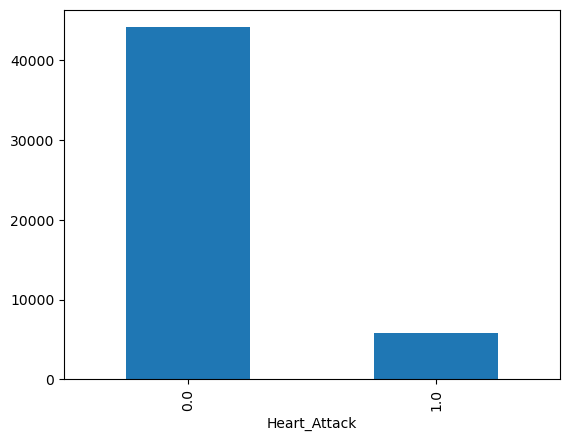

In [107]:
data["Heart_Attack"].value_counts().plot(kind="bar")

Age


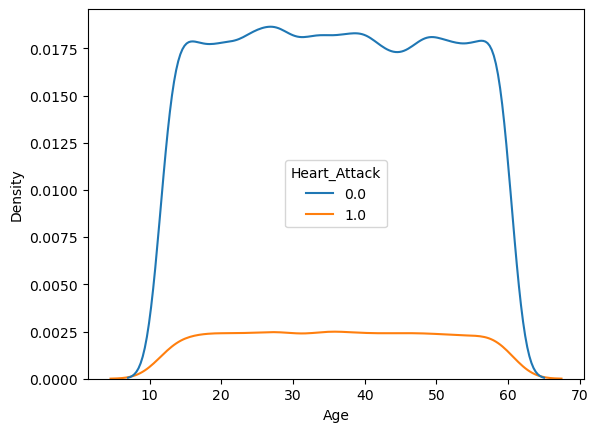

Blood_Pressure


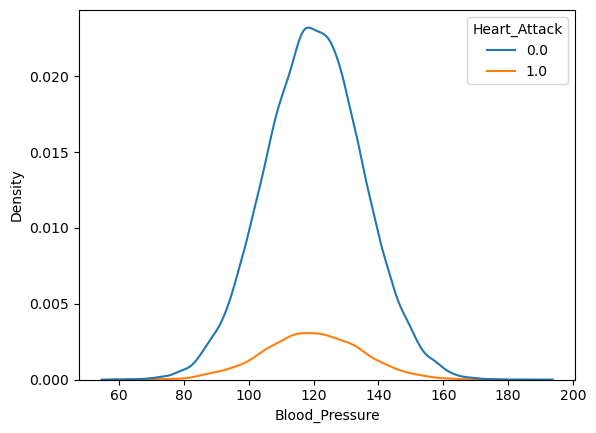

Cholesterol


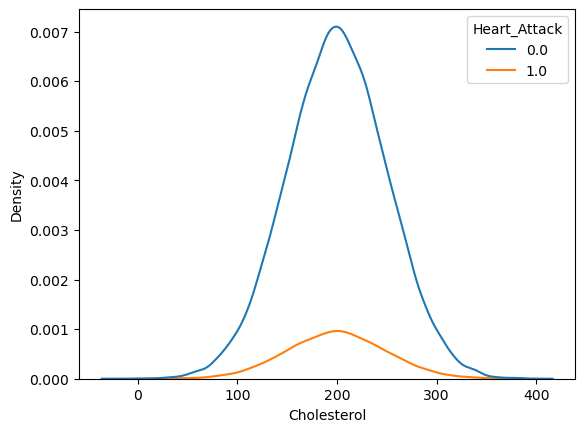

BMI


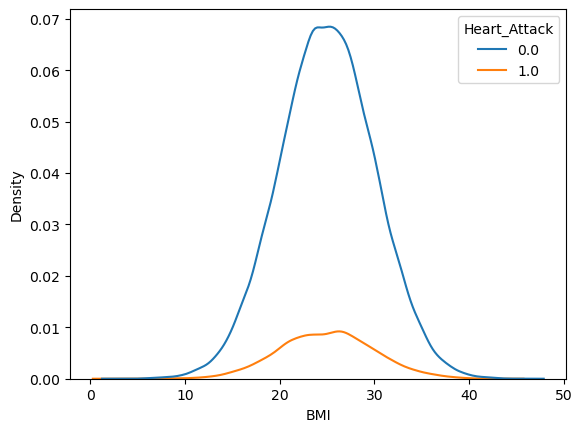

Heart_Rate


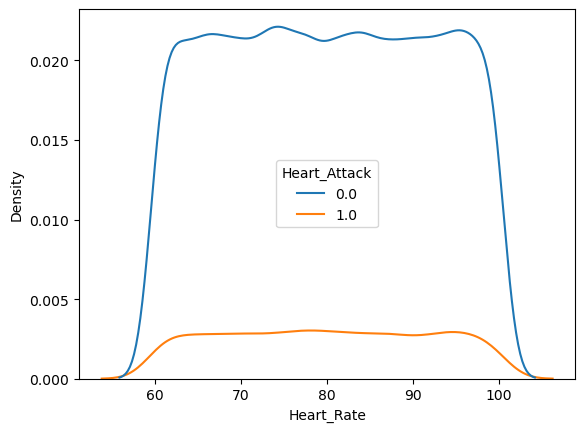

Smoking


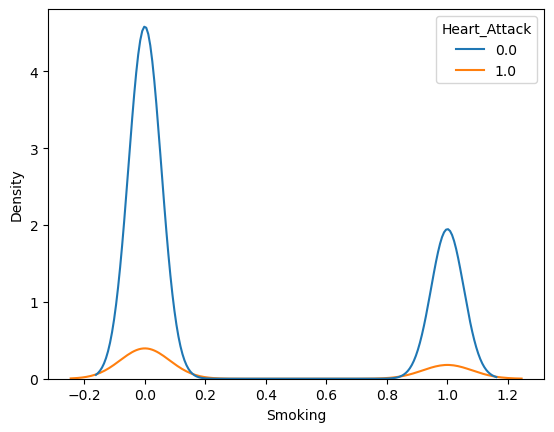

Diabetes


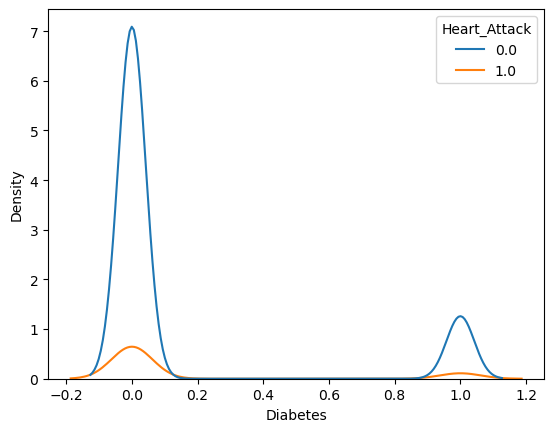

Family_History


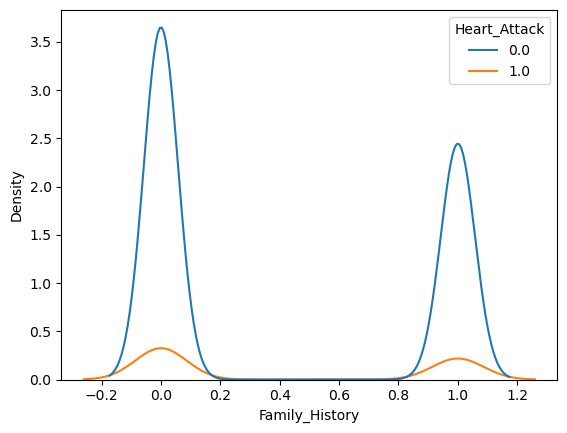

Stress_Level


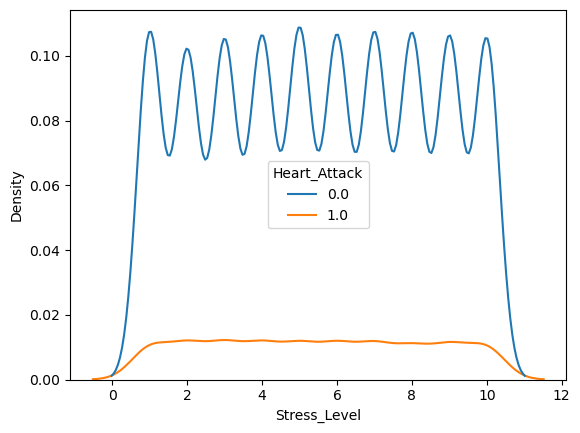

Heart_Attack


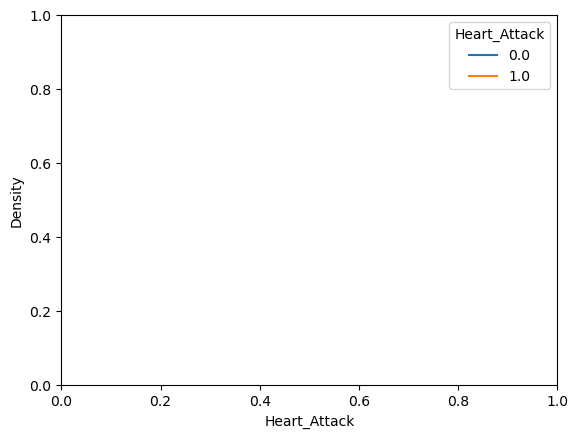

Angina


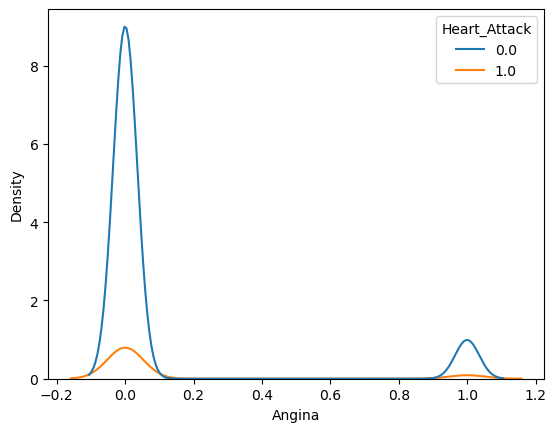

Heart_Disease_History


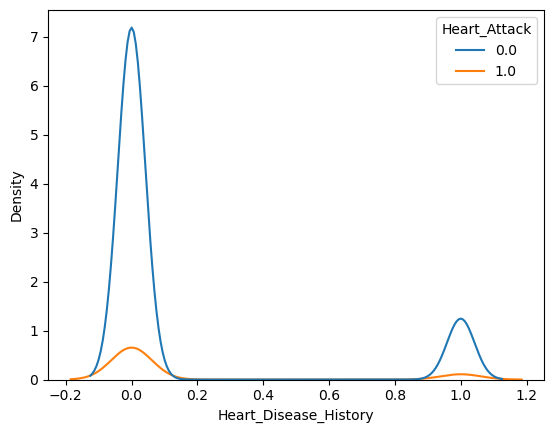

Sleep_Hours


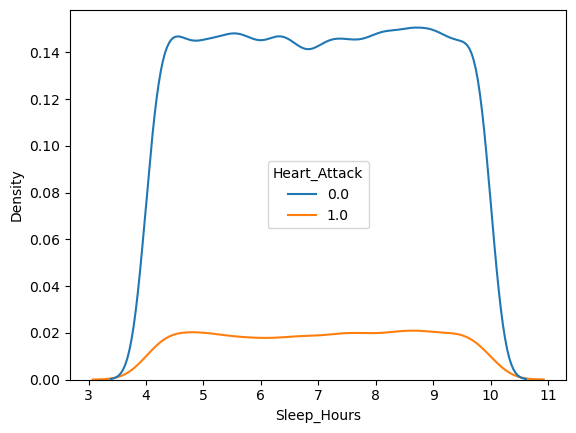

Medication


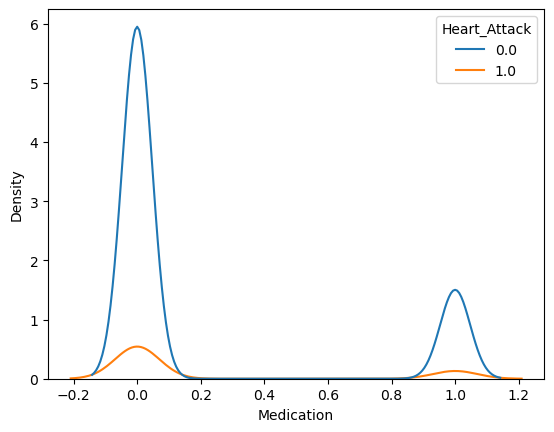

Health_Awareness


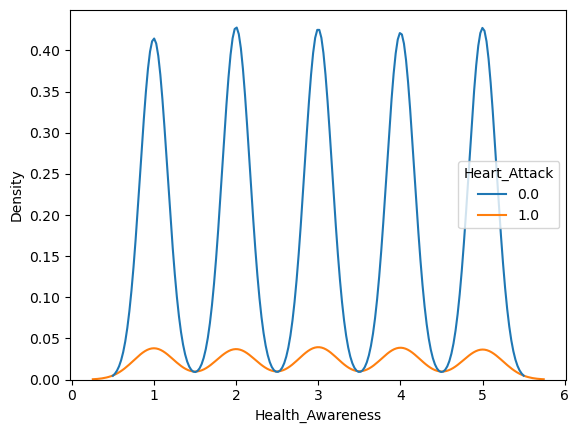

Daily_Water_Intake


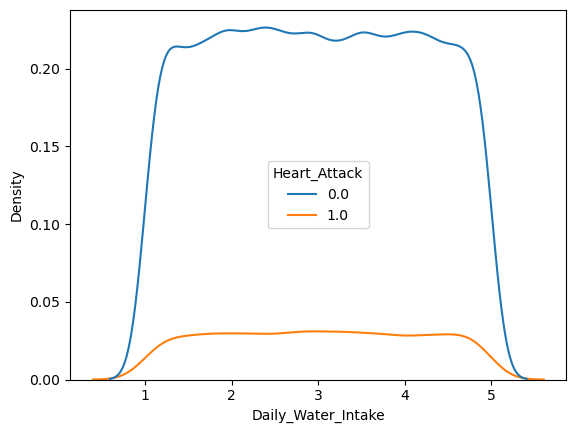

Mental_Health


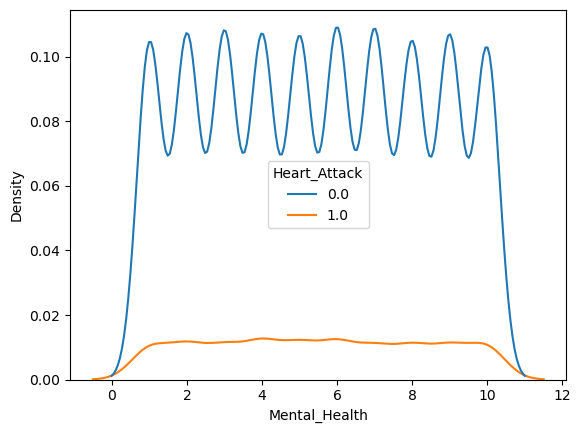

Obesity


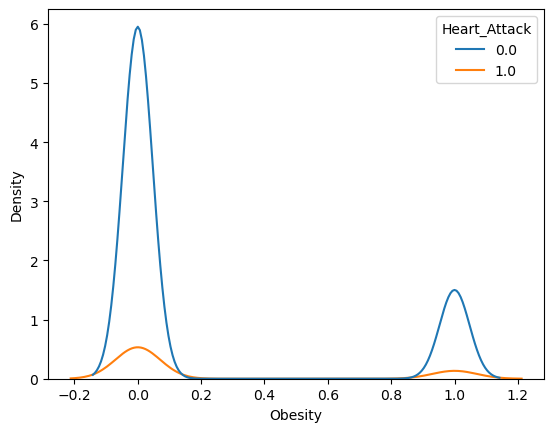

In [108]:
for i in data.select_dtypes(exclude="object"):
    print(i)
    sns.kdeplot(x=data[i],hue=data.Heart_Attack)
    plt.show()

In [ ]:
#log(odds)=B1.x1 +b2.x2...bnxn +b0
#logistic regression

In [115]:
xtrain_c=sm.add_constant(xtrain)
xtest_c= sm.add_constant(xtest)

In [117]:
xtrain_c.head(1)

,const,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
18542,1.0,38,137.5,249.9,20.5,95,2,1,2,1,0,4,0,0,2,9.9,2,2,0,1,5,3.4,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0


In [121]:
model1=sm.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.362134
         Iterations 6


In [123]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Heart_Attack   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39964
Method:                           MLE   Df Model:                           35
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                0.001200
Time:                        15:43:47   Log-Likelihood:                -14485.
converged:                       True   LL-Null:                       -14503.
Covariance Type:            nonrobust   LLR p-value:                    0.4767
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7774        nan        nan        nan         nan         nan
Age                       0.0003      0.001      0.258      0.796      -0.002       0.002
Blood_Pressure           -0.0022      0.001     -2.096      0.036      -0.004      -0.000
Cholesterol              -0.0004      0.000     -1.273      0.203      -0.001       0.000
BMI                      -0.0012      0.003     -0.391      0.696      -0.007       0.005
Heart_Rate               -0.0003      0.001     -0.254      0.799      -0.003       0.002
Exercise_Level           -0.0010      0.022     -0.046      0.963      -0.044       0.042
Smoking                   0.0693      0.034      2.070      0.038       0.004       0.135
Alcohol_Consumption       0.0423      0.051      0.825      0.410      -0.058       0.143
Diabetes                 -0.0254      0.044     -0.582      0.561      -0.111       0.060
Family_History           -0.0166      0.032     -0.522      0.602      -0.079       0.046
Stress_Level             -0.0088      0.005     -1.621      0.105      -0.019       0.002
Angina                    0.0288      0.051      0.562      0.574      -0.072       0.129
Heart_Disease_History     0.0198      0.044      0.455      0.649      -0.066       0.105
Diet                      0.0104      0.019      0.556      0.578      -0.026       0.047
Sleep_Hours               0.0139      0.009      1.554      0.120      -0.004       0.031
Income_Level              0.0308      0.021      1.490      0.136      -0.010       0.071
Physical_Activity         0.0245      0.022      1.108      0.268      -0.019       0.068
Urban_Rural               0.0491      0.032      1.543      0.123      -0.013       0.112
Medication               -0.0677      0.039     -1.722      0.085      -0.145       0.009
Health_Awareness         -0.0054      0.011     -0.492      0.623      -0.027       0.016
Daily_Water_Intake        0.0014      0.013      0.103      0.918      -0.025       0.028
Mental_Health          -1.95e-06      0.005     -0.000      1.000      -0.011       0.011
Obesity                  -0.0105      0.039     -0.270      0.787      -0.087       0.066
Female                   -0.2135   7.21e+05  -2.96e-07      1.000   -1.41e+06    1.41e+06
Male                     -0.2169   7.33e+05  -2.96e-07      1.000   -1.44e+06    1.44e+06
Other                    -0.3471    7.4e+05  -4.69e-07      1.000   -1.45e+06    1.45e+06
Rural                    -0.2561   1.44e+06  -1.77e-07      1.000   -2.83e+06    2.83e+06
Suburban                 -0.2438   1.45e+06  -1.69e-07      1.000   -2.83e+06    2.83e+06
Urban                    -0.2775   1.44e+06  -1.92e-07      1.000   -2.83e+06    2.83e+06
Employed                 -0.1881   3.14e+05     -6e-07      1.000   -6.15e+05    6.15e+05
Retired                  -0.2124   3.14e+05  -6.77e-07      1.000   -6.15e+05    6.15e+05
Student                  -0.1595   3.14e+05  -5.09e-07      1.000   -6.15e+05    6.15e+05
U